# Projeto #1 - Análise Exploratória de Dados

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela?

*Indique o link da base no Kaggle e explique em um parágrafo curto por que essa base é interessante para você.*

Link kagle: https://www.kaggle.com/equeiroz/acidentes-rodovias-federais-brasil-jan07-a-jul19

Link do drive com os dados integrados: https://drive.google.com/drive/folders/1T5AcEd15lx59zlK-aHLN3Tdnq4PNbD7S?usp=sharing

Essa base despertou meu interesse por se tratar de uma realidade brasileira. As causas de acidentes ocorrem pelas condições das estradas? Pelas imperícias dos motoristas? Essas são algumas das perguntas que passam na minha cabeça quando vejo uma notícia de acidente. Logo, é interessante ter essas respostas através da análise dos dados.

### 2) **(5%)** Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).
- Identificação da variável a serem trabalhadas
- Classificação das variáveis como: contínua ou discreta.


*Descrição da base e suas variáveis*

Essa base é composta pelos dados da Polícia Rodoviária Federal sobre os registros de ocorrências de acidentes nas rodovias federais brasileiras no período de 01/2007 a 07/2019. Composto por 24 colunas e 1.758.765 registros.

CATEGÓRICAS:

- uf
- municipio
- causa_acidente
- tipo_acidente
- classificacao_acidente
- fase_dia
- sentido_via
- condicao_metereologica
- tipo_pista
- tracado_via
- uso_solo

CONTÍNUAS:

- id
- data_inversa
- horario
- br

DISCRETAS:

- pessoas
- mortos
- feridos_leves
- feridos_graves
- ilesos
- ignorados
- feridos
- veiculos

### 3) **(15%)** Faça uma avaliação descritiva da sua base. Quantas linhas ela possui? Quais os tipos de dados? Quantas e quais features possuem?

Cada variável escolhida pelo aluno precisa passar por ao menos 1 pré-processamento. O pré-processamento pode ser (mas não está limitado a):
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [0]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('bmh')

%matplotlib inline

In [0]:
df = pd.read_csv('acidentes-rodovia-br.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head(2)

/home/gustavo/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,data_inversa,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,...,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
0,1035523.0,2012-01-01,15:45:00,SC,282,513.7,XAXIM,Velocidade incompatível,Saída de Pista,Com Vítimas Feridas,...,Curva,Rural,2,0,1,0,1,0,1,1
1,1035527.0,2012-01-01,03:00:00,SC,280,188,MAFRA,Ingestão de álcool,Colisão lateral,Com Vítimas Feridas,...,Curva,Rural,3,0,1,0,2,0,1,2


In [0]:
df.drop(df[df.uf == '(null)'].index, inplace=True)
df.drop(df[df.classificacao_acidente == '(null)'].index, inplace=True)

print('Números de linhas:', df.shape[0])
print('Números de colunas:', df.shape[1])
print('Colunas presentes: ')
print(df.columns)

Números de linhas: 1758728
Números de colunas: 24
Colunas presentes: 
Index(['id', 'data_inversa', 'horario', 'uf', 'br', 'km', 'municipio',
       'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia',
       'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via',
       'uso_solo', 'pessoas', 'mortos', 'feridos_leves', 'feridos_graves',
       'ilesos', 'ignorados', 'feridos', 'veiculos'],
      dtype='object')


In [0]:
df.dtypes

id                        float64
data_inversa               object
horario                    object
uf                         object
br                         object
km                         object
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
uso_solo                   object
pessoas                     int64
mortos                      int64
feridos_leves               int64
feridos_graves              int64
ilesos                      int64
ignorados                   int64
feridos                     int64
veiculos                    int64
dtype: object

In [0]:
print('Porcentagem de dados ausentes:')

valor_faltante = df.isnull().sum()
celulas = np.product(df.shape)
print((valor_faltante.sum()/celulas) * 100)

Quantidade de dados ausentes:


id                          0
data_inversa                0
horario                     0
uf                          0
br                        320
km                        320
municipio                   0
causa_acidente              0
tipo_acidente               0
classificacao_acidente      1
fase_dia                    1
sentido_via                 0
condicao_metereologica      3
tipo_pista                  0
tracado_via                 0
uso_solo                    0
pessoas                     0
mortos                      0
feridos_leves               0
feridos_graves              0
ilesos                      0
ignorados                   0
feridos                     0
veiculos                    0
dtype: int64

In [0]:
df.dropna(inplace=True)

Quantidade de dados ausentes:


id                        0
data_inversa              0
horario                   0
uf                        0
br                        0
km                        0
municipio                 0
causa_acidente            0
tipo_acidente             0
classificacao_acidente    0
fase_dia                  0
sentido_via               0
condicao_metereologica    0
tipo_pista                0
tracado_via               0
uso_solo                  0
pessoas                   0
mortos                    0
feridos_leves             0
feridos_graves            0
ilesos                    0
ignorados                 0
feridos                   0
veiculos                  0
dtype: int64

In [0]:
print('Porcentagem de dados duplicados: ')
valor_duplicado = df.duplicated().sum()
print((valor_duplicado.sum()/celulas)*100)

Quantidade de dados duplicados:  0


In [0]:
df.id = df.id.astype('int32')
df.pessoas = df.pessoas.astype('int16')
df.mortos = df.mortos.astype('int16')
df.feridos_leves = df.feridos_leves.astype('int16')
df.feridos_graves = df.feridos_graves.astype('int16')

df.ilesos = df.ilesos.astype('int16')
df.ignorados = df.ignorados.astype('int16')
df.feridos = df.feridos.astype('int16')
df.veiculos = df.veiculos.astype('int16')

df.km = df.km.astype('category')
df.uf = df.uf.astype('category')
df.br = df.br.astype('category')
df.municipio = df.municipio.astype('category')

df.causa_acidente = df.causa_acidente.astype('category')
df.tipo_acidente = df.tipo_acidente.astype('category')
df.data = df.classificacao_acidente.astype('category')
df.fase_dia = df.fase_dia.astype('category')
df.sentido_via = df.sentido_via.astype('category')

df.condicao_metereologica = df.condicao_metereologica.astype('category')
df.tipo_pista = df.tipo_pista.astype('category')
df.tracado_via = df.tracado_via.astype('category')
df.uso_solo = df.uso_solo.astype('category')
df.classificacao_acidente = df.classificacao_acidente.astype('category')

df.dtypes

/home/gustavo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


id                           int32
data_inversa                object
horario                     object
uf                        category
br                        category
km                        category
municipio                 category
causa_acidente            category
tipo_acidente             category
classificacao_acidente    category
fase_dia                  category
sentido_via               category
condicao_metereologica    category
tipo_pista                category
tracado_via               category
uso_solo                  category
pessoas                      int16
mortos                       int16
feridos_leves                int16
feridos_graves               int16
ilesos                       int16
ignorados                    int16
feridos                      int16
veiculos                     int16
dtype: object

In [0]:
df['data'] = df.data_inversa.map(str) + ' ' + df.horario
df.drop(['data_inversa', 'horario'], axis=1, inplace=True)
df['data'] = pd.to_datetime(df['data'])

df['ano'] = df['data'].dt.year
df['mes'] = df['data'].dt.month
df.head(2)

,id,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,...,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,data,ano,mes
0,1035523,SC,282,513.7,XAXIM,Velocidade incompatível,Saída de Pista,Com Vítimas Feridas,Pleno dia,Crescente,...,0,1,0,1,0,1,1,2012-01-01 15:45:00,2012,1
1,1035527,SC,280,188,MAFRA,Ingestão de álcool,Colisão lateral,Com Vítimas Feridas,Plena noite,Crescente,...,0,1,0,2,0,1,2,2012-01-01 03:00:00,2012,1


In [0]:
# Pra nivelamento da análise, considerarei apenas anos completos.
df_2007_2018 = df[df['ano']!= 2019]
df_2007_2018['ano'].unique()

array([2012, 2013, 2018, 2008, 2016, 2009, 2014, 2010, 2007, 2017, 2011,
       2015])

### 4) **(60%)** Nos blocos seguintes construa análises que vão justificar suas conclusões.

#### 4.1) **(20%)** Análise 1 -  Distribuição dos valores para cada uma das variáveis
- Exemplo para variável contínua: se o conjunto de dados possui a variável "idade". Quantos % possui a idade entre 0 e 30 anos? 31 a 59? 60+?

- Exemplo para variável discreta: se o conjunto de dados possui a variável "gênero", quantos % do conjunto de dados é do sexo feminino, quantos % é masculino? Inclua outros gêneros se houver.


In [0]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

Text(0.5, 1.0, 'Porcentagem da classificação dos acidentes')

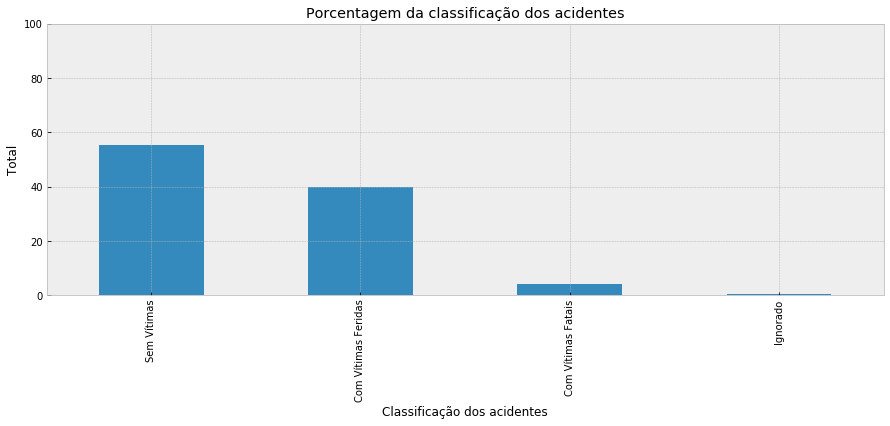

In [0]:
#classificacao_acidente = 55.39 sem vítimas

round((pd.value_counts(df_2007_2018['classificacao_acidente']) *100) / len(df_2007_2018), 2) .plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 100)

plt.ylabel('Total')
plt.xlabel('Classificação dos acidentes')
plt.title('Porcentagem da classificação dos acidentes')

Text(0.5, 1.0, 'Porcentagem de acidentes por estado')

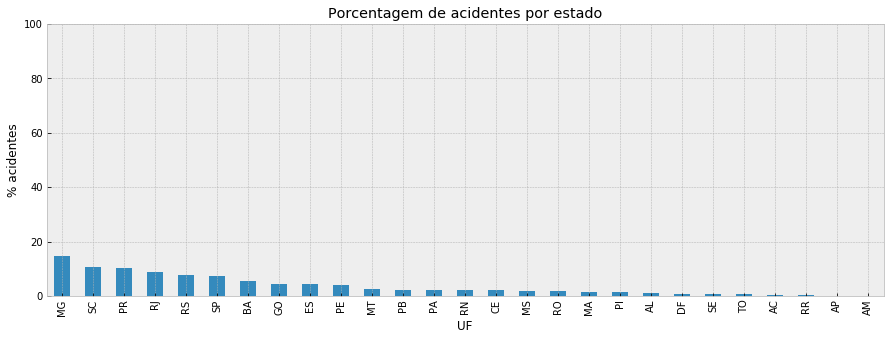

In [0]:
round((pd.value_counts(df_2007_2018['uf']) * 100) / len(df_2007_2018), 2).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 100)

plt.ylabel('% acidentes')
plt.xlabel('UF')
plt.title('Porcentagem de acidentes por estado')

Text(0.5, 1.0, '10 principais causas de acidentes')

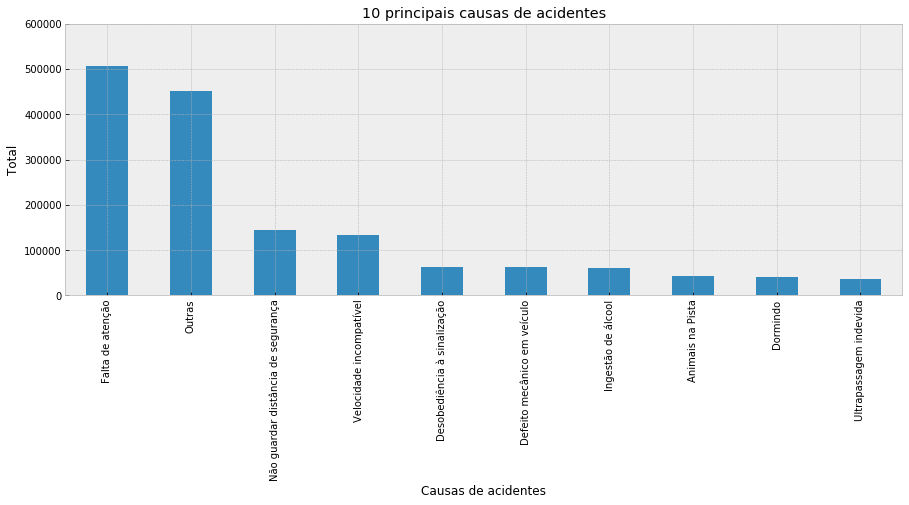

In [0]:
pd.value_counts(df_2007_2018['causa_acidente']).head(10).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 600000)

plt.ylabel('Total')
plt.xlabel('Causas de acidentes')
plt.title('10 principais causas de acidentes')

Text(0.5, 1.0, 'Quantidade de mortos por UF')

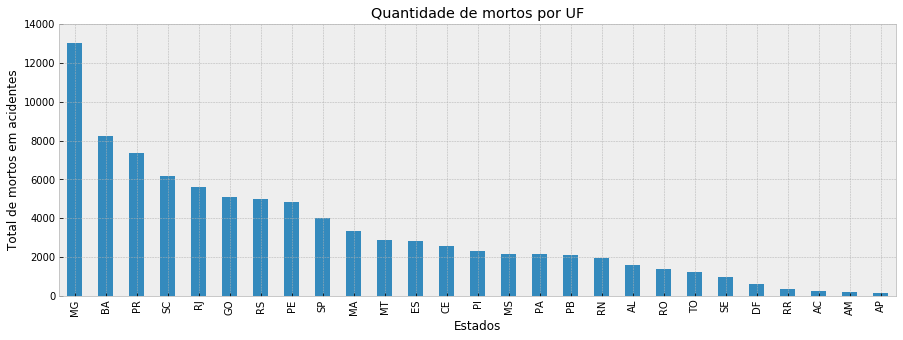

In [0]:
df_2007_2018.groupby(['uf'])['mortos'].sum().sort_values(ascending=False).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 14000)

plt.ylabel('Total de mortos em acidentes')
plt.xlabel('Estados')
plt.title('Quantidade de mortos por UF')

Text(0.5, 1.0, 'Quantidade de acidentes por ano')

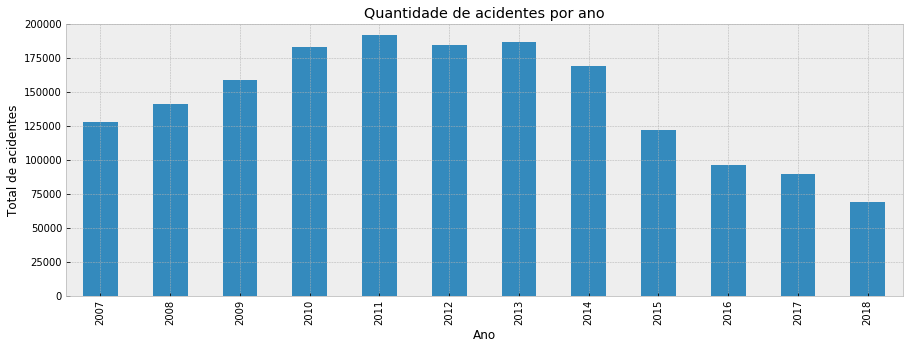

In [0]:
df_2007_2018.groupby(['ano'])['id'].count().plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 200000)

plt.ylabel('Total de acidentes')
plt.xlabel('Ano')
plt.title('Quantidade de acidentes por ano')

#### 4.2) **(20%)** Análise 2 - Dependência entre variáveis
O aluno deve apresentar as mesmas distribuições para cada valor da variável dependente. Exemplo: Em um conjunto de dados em que as variáveis independentes são idade e sexo, e a variável dependente é renda. O aluno pode dividir a renda em 3 "grupos", <1000 reais, entre 1000 e 10000 reais e >1000 reais. Para cada um desses grupos, é necessário apresentar a distribuição das variáveis "idade" e "sexo".


In [0]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

#### 4.3) **(20%)** Análise 3 - Correlação entre variáveis

O aluno deve apresentar 3 análises de correlação entre variáveis do conjunto de dados trabalhado. Exemplo: Em um conjunto de dados com as informações de temperatura e ocorrência de incêndios, eu gostaria de saber a incidência de correlação entre as duas variáveis.



In [0]:
# Primeiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

#clima x acidentes , periodo do dia, tipo de pista

In [0]:
# Segundo par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [0]:
# Terceiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

### 5) Conclusões **15%**

*O que é possível concluir com os dados que você analisou? Se fosse fazer uma apresentação, o que levaria como os maiores destaques e por que?*

Por ter a maior malha rodoviária, MG, possui maior taxa de acidente (14%).